### Ce notebook permet de calculer la portée maximale de détection en fonction de la fréquence utilisée et du niveau de bruit ambiant considéré (partie 3.2.1 du rapport)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import itertools

---
---
## Equation du sonar 

In [2]:
# sonar equation
SL = 185                 # Souce level (dB)
NL = 82                  # Noise level (dB)
DI = 0                   # Directivity index (dB)
B = 200                  # bandwidth (Hz)
T = 1                    # transmitted signal duration (s)
PG = 10.0*np.log10(B*T)  # Processing gain (dB)

#RT  = SL - TL - NL + DI + PG 

---
## Coefficient d'absorption du son dans l'eau

In [ ]:
### Equation de François-Garrison 

ph = 8.1  # pH
z = 0     # profondeur en m
T = 12.   # température en °C
nu = 12.  # fréquence en kHz
s=35      # salinité en psu

In [ ]:
## Contribution de B(OH)3
c = 1412 + 3.21*T + 1.19*s + 0.0167*z
A1 = 8.86/c*10**(0.78*ph-5)
P1 = 1 
nu1 = 2.8*np.sqrt(s/35)*10**(4-1245/(T+273))

### Contribution de MgSO4
A2 = 21.44*s/c * (1+0.025*T)
P2 = 1 - 1.37e-4*z + 6.2e-9*z**2
nu2 = 8.17*10**(8-1990/(T+273)) / (1+0.0018*(s-35))

# Contribution de la viscosité de l'eau pure 
P3 = 1 - 3.83e-5*z + 4.9e-10*z**2
A3 = 4.937e-4 - 2.59e-5*T + 9.11e-7*T**2 - 1.5e-8*T**3

In [ ]:
alpha = A2*P2* nu2*nu**2/(nu**2 + nu2**2) + A1*P1* nu1*nu**2/(nu**2 + nu1**2) + A3*P3*nu
alpha

In [3]:

# 3 kHz
alpha3 = 0.19/1000.    #dB/m 
# 12 kHz
alpha12 = 1.23/1000.   #dB/m    

---
## Niveau de bruit d'après le spectre de Wenz (Annexe B du rapport)

In [4]:


# Etat de mer 0
NL3a = 45.    #dB (3 kHz)
NL12a = 40.   #dB (12 kHz)

#Etat de mer 2
NL3b = 77.    #dB (3 kHz)
NL12b = 61.   #dB (12 kHz)

# Etat de mer 4
NL3 = 82.     #dB (3 kHz)
NL12 = 71.    #dB (12 kHz)

---
## Rapport signal sur bruit (RSB)

In [80]:
R = np.arange(0.1,150.1,0.2)*1000. #m

In [81]:
TL3 = 20*np.log10(R) + alpha3*R
TL12 = 20*np.log10(R)+alpha12*R

RL3 = SL - TL3 - NL3 + DI + PG
RL12 = SL - TL12 -NL12 + DI + PG

In [82]:

RL3a = SL - TL3 - NL3a + DI + PG
RL3b = SL - TL3 - NL3b + DI + PG
RL12a = SL - TL12 -NL12a + DI + PG
RL12b = SL - TL12 -NL12b + DI + PG

---
---
## Graphe : RSB  en fonction de la distance, de la fréquence et de NL 

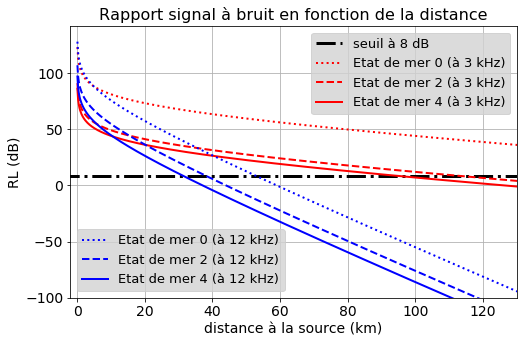

In [89]:
plt.figure(figsize=(8,5))


l0, = plt.plot([-5.,150.], [8.,8.], '-.k', label='seuil à 8 dB', linewidth=3.)

l1, = plt.plot(R/1000., RL3a, ':r', label='Etat de mer 0 (à 3 kHz)', linewidth=2.)
l2, = plt.plot(R/1000., RL3b, '--r', label='Etat de mer 2 (à 3 kHz)', linewidth=2.)
l3, = plt.plot(R/1000., RL3, 'r', label='Etat de mer 4 (à 3 kHz)', linewidth=2.)

first_legend = plt.legend(handles=[l0, l1, l2, l3], loc=1, fontsize=13,  facecolor = 'lightgrey')
ax = plt.gca().add_artist(first_legend)


l4, = plt.plot(R/1000., RL12a, ':b', label='Etat de mer 0 (à 12 kHz)', linewidth=2.)
l5, = plt.plot(R/1000., RL12b, '--b', label='Etat de mer 2 (à 12 kHz)', linewidth=2.)
l6, = plt.plot(R/1000., RL12, 'b', label='Etat de mer 4 (à 12 kHz)', linewidth=2.)

plt.legend(handles=[l4, l5, l6], loc=3, fontsize=13, facecolor = 'lightgrey')



plt.title("Rapport signal à bruit en fonction de la distance", fontsize=16)
plt.xlabel('distance à la source (km)', fontsize=14)
plt.ylabel('RL (dB)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-2.,122.])
plt.ylim(ymin=-100.)
plt.grid()
plt.xlim(xmax=130)

plt.savefig('portee_max', dpi=100.)